### 0. Imports

In [1]:
import pandas as pd

import sys
sys.path.append('/home/rachel/Documents/lfp2spikes/modularized_code') 
from data_prep.data_preparation import DATA_PREP
from data_loader.lfp_loader import LFP_LOADER
from data_loader.spike_loader import SPIKE_LOADER


Epiphyte Tube version loaded.
Connecting fkaltenberger@134.2.168.111:3306


### 1. Inits and data loading

In [2]:
dp = DATA_PREP()
lfp_ldr = LFP_LOADER()
spk_ldr = SPIKE_LOADER()

/home/rachel/Documents/lfp2spikes/modularized_code


In [ ]:
#path_lfp = "Documents/lfp2spikes/code/data_prep/data/prepro_data/pat66_LFP_df_prepro.csv"
#path_lfp = "/home/rachel/Documents/lfp2spikes/code/data_prep/data/prepro_data/pat66_LFP_df_prepro.csv"
path_lfp = "../data/lfp_data/p66_lfps_notch50_zscore.csv"
#path_spikes = "/home/rachel/Documents/lfp2spikes/code/data_prep/data/prepro_data/pat66_spikes_df_prepro.csv"
path_spikes = "../data/spikes_data/p66_spikes_bin1ms.csv"

df_lfps = pd.read_pickle(path_lfp)
df_spikes = pd.read_pickle(path_spikes)

#df_lfps_orig = df_lfps.copy()

Set all variables:

In [3]:
bin_size = 1
SUA = True
MUA = False
spike_type = "SUA" if SUA else ("MUA" if MUA else "ALL")
selected_channels = [5, 6, 9, 10, 11, 12, 13, 16, 36, 40]
#selected_channels = [57, 58, 59, 60, 61, 63, 64, 79, 80]

# moving average parameters
ma_window_size = None
ma_shift = None

# cliping parameters
pre_window = 30
lag = 1  # bin_size
clip_size = (pre_window, lag)
origin = "zscored"
clip_mode="extend"

# split variables
number_frames_in_clip = (pre_window/40) / bin_size
length_of_frame = 40



### 2. Prepare data

In [5]:
lfp_ldr.set_start_stop_times(df_lfps)

df_spikes = spk_ldr.bin_spikes(
    df_spikes, 
    lfp_ldr.get_start_stop_times(), 
    bin_size
)
print(f"Binned spikes to {bin_size}ms bins")

df_lfps, df_spikes = dp.compress_dataset(
    df_lfps, 
    df_spikes,
    bin_size,
    use_S_spikes=SUA, 
    use_M_spikes=MUA, 
    selected_channels=selected_channels
)
print(f"Data combined for channels: {selected_channels}")

df_lfps = dp.clip_lagged_lfps(
    df_lfps, 
    origin, 
    clip_size
)

print(f"Clipped lfps (lagged) with clip size {clip_size}")

df_spikes = dp.clip_lagged_spikes(
    df_spikes, 
    df_lfps, 
    bin_size, 
    origin, 
    clip_size, 
    clip_mode
)

print(f"Clipped spikes (lagged) with clip mode {clip_mode}")


Binned spikes to 10ms bins
Data combined for channels: [57, 58, 59, 60, 61, 63, 64, 79, 80]
Clipped lfps (lagged) with clip size (10, 1)
4962970
4962970
4962970
4962970
4962970
4962970
4962970
4962970
4962970
4962970
4962970
4962970
4962970
4962970
4962970
4962970
4962970
4962970
4962970
4962970
Clipped spikes (lagged) with clip mode extend


/home/rachel/Documents/lfp2spikes/modularized_code/data_prep/data_preparation.py:463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spikes[f"bin{bin_size}_extended"][i] = df_spikes[f"bin{bin_size}_extended"][i][pre_window:][:max_t_lfp]
/home/rachel/Documents/lfp2spikes/modularized_code/data_prep/data_preparation.py:468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lfps[f"{origin}_c{clip_size}"][i] = df_lfps[f"{origin}_c{clip_size}"][i][:max_t]


In [6]:
print(df_spikes[f"bin{bin_size}_extended"][0].shape)
print(df_lfps[f"{origin}_c{clip_size}"][0].shape)

(4962970,)
(4962970, 10)


In [7]:
save_name_lfps = f"data/{spike_type}/pat66_lfps{spike_type}_df_{origin}_c{clip_size}_b{bin_size}"
save_name_spikes = f"data/{spike_type}/pat66_spikes{spike_type}_df_b{bin_size}_c{clip_size}"

lfp_ldr.save_lfps(df_lfps, save_name_lfps)
lfp_ldr.save_lfps(df_spikes, save_name_spikes)

In [5]:
lfp_ldr.set_start_stop_times(df_lfps)

df_spikes_bnd = spk_ldr.bin_spikes(
    df_spikes, 
    lfp_ldr.get_start_stop_times(), 
    bin_size
)
print(f"Binned spikes to {bin_size}ms bins")

df_lfps_comp, df_spikes_comp = dp.compress_dataset(
    df_lfps, 
    df_spikes_bnd,
    bin_size,
    use_S_spikes=SUA, 
    use_M_spikes=MUA, 
    selected_channels=selected_channels
)
print(f"Data combined for channels: {selected_channels}")

df_lfps_clpd = dp.clip_lagged_lfps(
    df_lfps_comp, 
    origin, 
    clip_size
)

print(f"Clipped lfps (lagged) with clip size {clip_size}")

df_spikes_ext = dp.clip_lagged_spikes(
    df_spikes_comp, 
    df_lfps_clpd, 
    bin_size, 
    origin, 
    clip_size, 
    clip_mode
)

print(f"Clipped spikes (lagged) with clip mode {clip_mode}")


Binned spikes to 1ms bins
Data combined for channels: [5, 6, 9, 10, 11, 12, 13]


In [6]:
print(df_spikes_ext[f"bin{bin_size}_extended"][0].shape)
print(df_lfps_clpd[f"{origin}_c{clip_size}"][0].shape)

(4962933,)
(4962933, 50)


#### 2.1 Controll STA

In [8]:
import numpy as np 

df_lfps_clpd[f"sta_idx{bin_size}"] = df_spikes_ext.apply(
    #lambda x : np.where(x[f"bin{bin_size}_cnt"] == 1)[0]
    lambda x : np.where(x[f"bin{bin_size}_extended"] > 0)[0]
    , axis=1
)
df_lfps.head(1)

,patient_id,session_nr,csc_nr,samples,timestamps,brain_region,movie_timestamps,movie_times,movie_samples,filtered,zscored
0,66,1,1,"[87.43982571348546, 89.84766536594209, 90.3204...","[117413594184.0, 117413595184.00008, 117413596...",LA1,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[-24.47657218848258, -22.39801085368898, -12.1...","[-24.16946400748021, -22.830642924634162, -13....","[-0.1634750409223574, -0.15459605837772247, -0..."


In [9]:
df_lfps_clpd[f"{origin}_c{clip_size}"][0][21]

array([0.8770737 , 0.91447299, 0.92811755, 0.98960077, 1.09792582,
       1.04247361, 1.21900566, 1.26784421, 1.22050952, 1.24762215])

In [10]:
interval = pre_window
source_sta = f"{origin}_c{clip_size}" # "zscored"
#spike_idx = np.where(df_spikes[f"STA_bin{bin_size}_cnt"][0] == 1)[0]

df_lfps_clpd[f"STA_spike_int{interval}_{source_sta}"] = df_lfps_clpd.apply(
    lambda x :
        x[source_sta][np.array(
            [i
            #[np.arange(i-interval, i+1, 1) 
             for i in x[f"sta_idx{bin_size}"]
            ]
             #if i+1+interval<len(x[source_sta])]
        )]
    , axis=1
)
df_lfps_clpd.head(1)

,patient_id,session_nr,csc_nr,samples,timestamps,brain_region,movie_timestamps,movie_times,movie_samples,filtered,zscored,"zscored_c(10, 1)",sta_idx1,"STA_spike_int10_zscored_c(10, 1)"
0,66,1,5,"[-8.413394433973691, -0.037944228473827606, 0....","[117413594184.0, 117413595184.00008, 117413596...",LA5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[6.0684185380560365, 4.566757940340394, 8.7837...","[7.783531321245922, 5.871285089688449, 9.54250...","[0.0532494889743174, 0.04023735724268466, 0.06...","[[0.0532494889743174, 0.04023735724268466, 0.0...","[190, 340, 348, 776, 851, 909, 990, 1042, 1100...","[[-0.11150021198160545, -0.10142188433466834, ..."


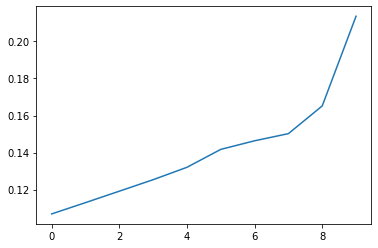

In [11]:
import matplotlib.pyplot as plt
plt.plot(df_lfps_clpd[f"STA_spike_int{interval}_{source_sta}"][0].transpose().mean(axis=1))
plt.show()

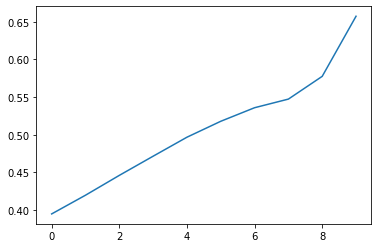

In [12]:
sta = np.zeros(pre_window)
n_csc = len(df_lfps_clpd)
for i in range(n_csc): 
    sta += df_lfps_clpd[f"STA_spike_int{interval}_{source_sta}"][i].transpose().mean(axis=1)
plt.plot(sta/n_csc)
plt.show()

### 3. Get splits

In [4]:
csc = "channels_5-40"
save_name_lfps = f"data/{spike_type}/{csc}/pat66_lfps{spike_type}_df_{origin}_c{clip_size}_b{bin_size}.csv"
save_name_spikes = f"data/{spike_type}/{csc}/pat66_spikes{spike_type}_df_b{bin_size}_c{clip_size}.csv"

df_lfps = dp.load_df_from_pkl(save_name_lfps)
df_spikes = dp.load_df_from_pkl(save_name_spikes)

In [5]:
# get source data
#x_lfps = df_lfps[f"movavg_w{ma_window_size}_o{ma_shift}_{origin}_c{clip_size}"]
#x_lfps = df_lfps_clpd[f"{origin}_c{clip_size}"]
x_lfps = df_lfps[f"{origin}_c{clip_size}"]
#x_spikes = df_spikes[f"movavg_w{ma_window_size}_o{ma_shift}_b{bin_size}_c{clip_size}"]
#x_spikes = df_spikes[f"movavg_w{ma_window_size}_o{ma_shift}_b{bin_size}_c{clip_size}"]
x_spikes = df_spikes[f"bin{bin_size}_extended"]
#x_spikes = df_spikes_ext[f"bin{bin_size}_extended"]

save_name_lfps = f"pat66_lfps{spike_type}_df_{origin}_c{clip_size}_b{bin_size}"
save_name_spikes = f"pat66_spikes{spike_type}_df_b{bin_size}_c{clip_size}"

cv_folds = dp.create_cv_splits(
    x_lfps, 
    x_spikes,
    ma_window_size, 
    ma_shift,
    origin,
    clip_size,
    spike_type,
    number_frames_in_clip,
    length_of_frame, 
    cv_folds=[2],
    save_lfps=save_name_lfps, 
    save_spikes=save_name_spikes,
    buffer_split=15
)


Data Split: Buffer 15, Sequence Length 0.03
15
Length of dataset: 4962953
Length of base: 190882
Length of buffer in nb of bins: 501
Fold Length is: 37675
*** DATA FOLD 2 *** 

Data Split: Buffer 15, Sequence Length 0.03
15
Length of dataset: 4962953
Length of base: 190882
Length of buffer in nb of bins: 501
Fold Length is: 37675
*** DATA FOLD 2 *** 

Data Split: Buffer 15, Sequence Length 0.03
15
Length of dataset: 4962953
Length of base: 190882
Length of buffer in nb of bins: 501
Fold Length is: 37675
*** DATA FOLD 2 *** 

Data Split: Buffer 15, Sequence Length 0.03
15
Length of dataset: 4962953
Length of base: 190882
Length of buffer in nb of bins: 501
Fold Length is: 37675
*** DATA FOLD 2 *** 

Data Split: Buffer 15, Sequence Length 0.03
15
Length of dataset: 4962953
Length of base: 190882
Length of buffer in nb of bins: 501
Fold Length is: 37675
*** DATA FOLD 2 *** 

Data Split: Buffer 15, Sequence Length 0.03
15
Length of dataset: 4962953
Length of base: 190882
Length of buffer i

OSError: [Errno 28] No space left on device

In [34]:
cv_folds[0][0]['train_dt'][0].shape

(2587468, 10)

In [35]:
cv_folds[0][0]['train_dt'][0].size

25874680